### Before Hand Operations to get best result out of each model for Heart Disease Prediction

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

In [111]:
df = pd.read_csv("heart.csv")

In [112]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
126,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
999,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
426,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
466,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
53,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
766,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
901,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1


In [113]:
df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

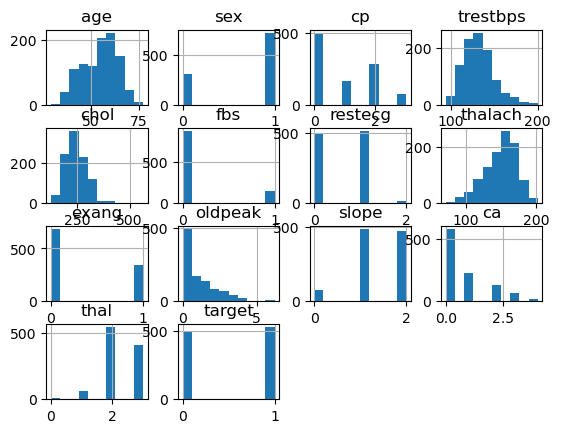

In [114]:
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

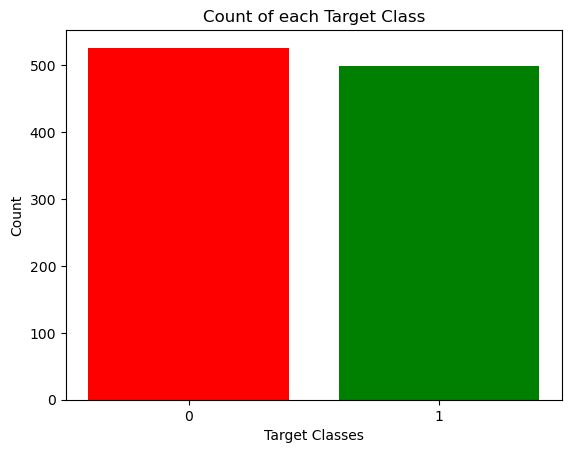

In [115]:
plt.bar(df['target'].unique(), df['target'].value_counts(),color=['red','green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

Using the get_dummies method, I will create dummy columns for categorical variables.

In [128]:
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [129]:
ss = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = ss.fit_transform(df[columns_to_scale])

In [130]:
df.sample(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
388,1.054918,-0.663216,3.466062e-18,-2.309863,0.960840,0,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
263,0.062402,0.022178,1.861644e+00,0.734343,0.109400,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
905,1.054918,-0.663216,3.466062e-18,-2.309863,0.960840,0,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
275,0.172682,-0.092055,7.175084e-01,-2.005443,0.449976,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
467,-0.819834,-1.234378,5.623715e-01,-1.353113,-0.060888,0,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
312,1.716595,1.621431,4.460188e-01,-1.614045,1.556849,0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
182,0.613800,0.479107,9.114297e-01,0.908298,0.109400,0,False,True,True,False,...,False,False,False,True,False,False,False,False,False,True
755,-0.709555,-0.434752,1.745291e-01,1.125741,-0.912329,1,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
711,-2.143189,-0.663216,-9.308218e-01,-0.831249,0.449976,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
579,0.393241,0.821804,-5.429794e-01,-1.918465,0.790552,0,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True


In [131]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## KNN

In [134]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

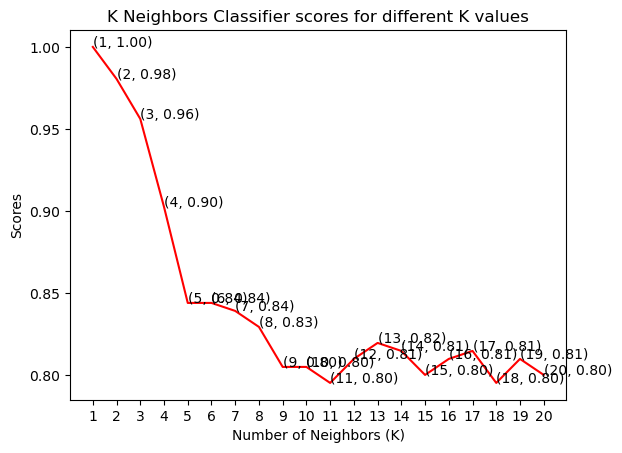

In [135]:
plt.plot([k for k in range(1, 21)], knn_scores, color='red')

for i in range(1, 21):
    # Format the score to two decimal places using :.2f
    plt.text(i, knn_scores[i - 1], f"({i}, {knn_scores[i - 1]:.2f})")

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

plt.show()


In [136]:
print("The score for K Neighbors Classifier is {}% with {} nieghbor.".format(knn_scores[0]*100, 1))

The score for K Neighbors Classifier is 100.0% with 1 nieghbor.


### Support Vector Classifier
There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score

In [137]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

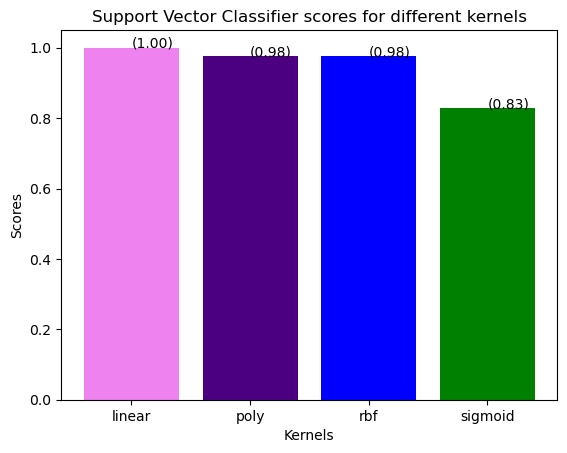

In [138]:
# colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = ['violet','indigo','blue','green'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], f"({svc_scores[i]:.2f})")
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

### Decision Tree Classifier

In [139]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

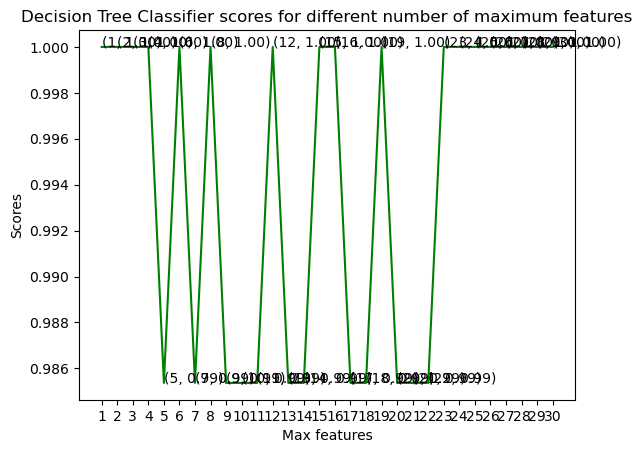

In [140]:
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1], f"({i}, {dt_scores[i - 1]:.2f})")
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features 1, 2, 3, 4 and more